<H2 align='center'>Preliminary Analysis</H2>

<H3>Imports</H3>

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

<H3>Default Params For MatplotLib</H3>

In [265]:
sns.set_style("whitegrid")
sns.set_context("poster")

In [266]:
df = pd.read_csv('../Data/hour.csv')
df.dteday = pd.to_datetime(df.dteday)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null datetime64[ns]
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(12)
memory usage: 2.3 MB


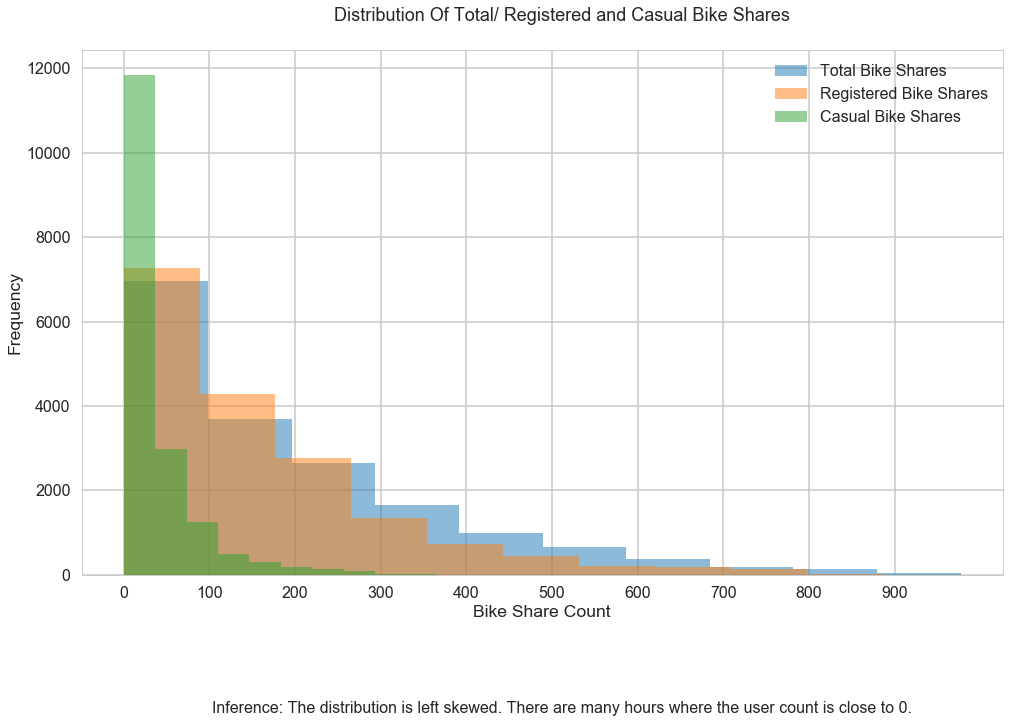

In [242]:
fig = plt.gcf()
fig.suptitle('Distribution Of Total/ Registered and Casual Bike Shares', 
            fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(16, 10)
plt.hist(df['cnt'], alpha=0.5)
plt.hist(df['registered'], alpha=0.5)
plt.hist(df['casual'], alpha=0.5)

plt.xticks(range(0,1000,100))
plt.xlabel('Bike Share Count')
plt.ylabel('Frequency');
fig.text(0.5,0, 'Inference: The distribution is left skewed. There are many hours where the user count is close to 0.',horizontalalignment='center',
     verticalalignment='baseline',
     size=16)
plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
plt.legend(['Total Bike Shares', 'Registered Bike Shares', 'Casual Bike Shares'])
plt.show()

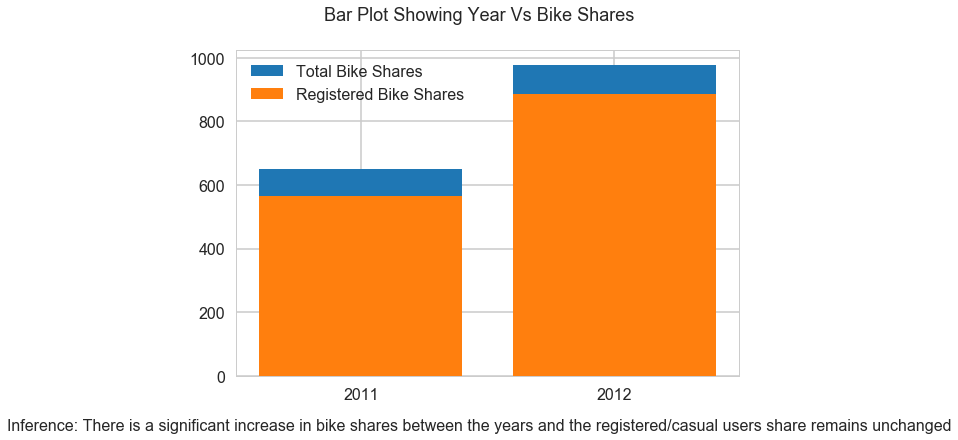

In [241]:
fig = plt.gcf()
fig.suptitle('Bar Plot Showing Year Vs Bike Shares', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(9, 6, forward=True)

plt.bar(df['yr'], df['cnt'])
plt.bar(df['yr'], df['registered'])
plt.xticks([0,1], [2011, 2012])
plt.legend(['Total Bike Shares', 'Registered Bike Shares'])
fig.text(0.5,0, 'Inference: There is a significant increase in bike shares between the years and the registered/casual users share remains unchanged',horizontalalignment='center',
     verticalalignment='baseline',
     size=16)
plt.show()

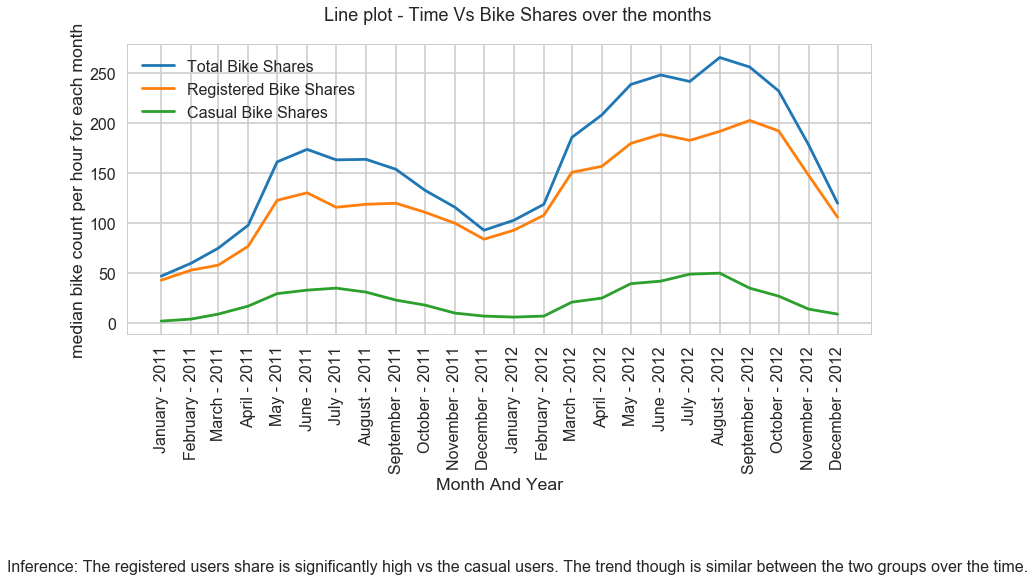

In [244]:
gby = df.groupby(lambda i : str(df.iloc[i].dteday.year)+'-'+str(df.iloc[i].dteday.month), axis=0)

df1 = pd.DataFrame({'cnt':gby.cnt.median(), 'registered':gby.registered.median(), 'casual':gby.casual.median()})

df1.index = pd.to_datetime(df1.index, format='%Y-%m')
df1.sort_index(inplace=True)


fig = plt.gcf()
fig.suptitle('Line plot - Time Vs Bike Shares over the months', 
             fontsize=18, horizontalalignment = 'center')
plt.plot(df1.index, df1.cnt)
plt.plot(df1.index, df1.registered)
plt.plot(df1.index, df1.casual)

plt.xlabel('Month And Year')
plt.ylabel('median bike count per hour for each month')
plt.legend(['Total Bike Shares', 'Registered Bike Shares', 'Casual Bike Shares'])

plt.xticks(df1.index, ["{} - {}".format(x.strftime("%B"), str(x.year)) for x in df1.index], rotation=90)
fig.text(0.5,0, 'Inference: The registered users share is significantly high vs the casual users. The trend though is similar between the two groups over the time.',horizontalalignment='center',
     verticalalignment='baseline',
     size=16)
plt.format_xdata = mdates.DateFormatter('%Y-%m')
plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
plt.show()

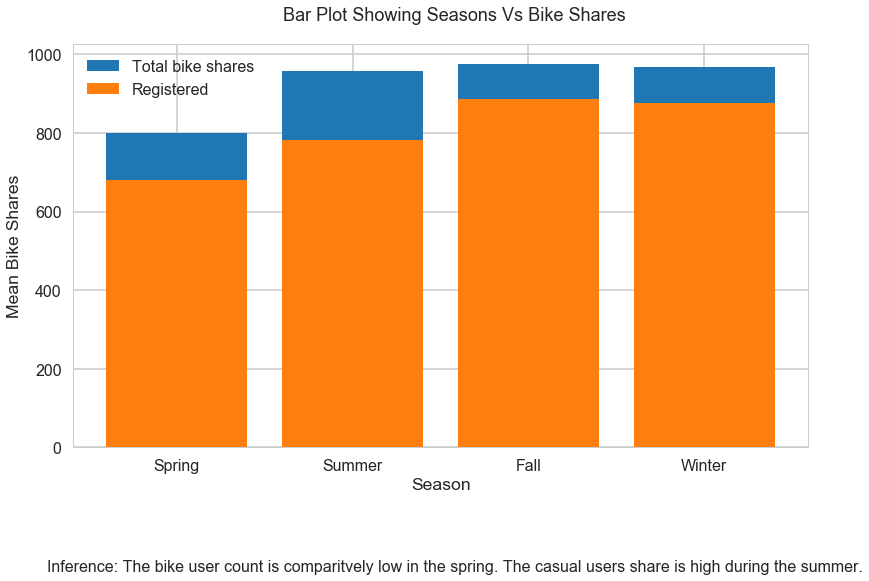

In [248]:
season_labels=['Spring', 'Summer', 'Fall', 'Winter']

fig = plt.gcf()
fig.suptitle('Bar Plot Showing Seasons Vs Bike Shares', 
             fontsize=18, horizontalalignment = 'center')

plt.bar(df['season'], df['cnt'])
plt.bar(df['season'], df['registered'])
plt.xlabel('Season')
plt.ylabel('Mean Bike Shares')
plt.xticks(range(1,5,1),season_labels)
plt.legend(['Total bike shares', 'Registered'])
plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
fig.text(0.5,0, 'Inference: The bike user count is comparitvely low in the spring. The casual users share is high during the summer.',horizontalalignment='center',
     verticalalignment='baseline',
     size=16)
plt.show()

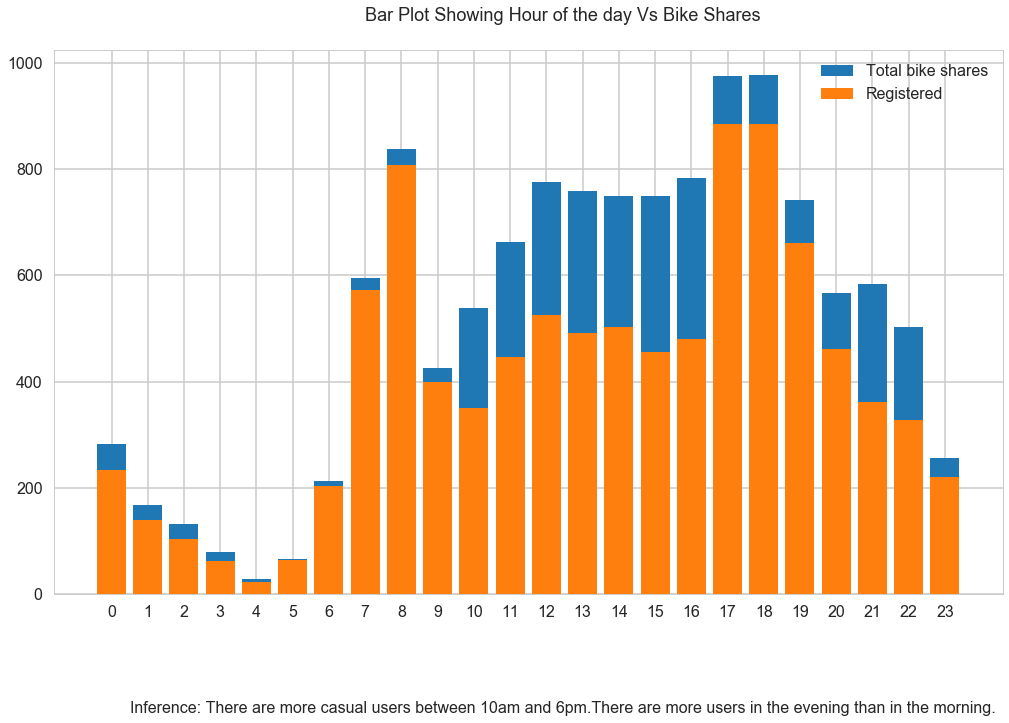

In [250]:
fig = plt.gcf()
fig.suptitle('Bar Plot Showing Hour of the day Vs Bike Shares', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(16, 10)

plt.bar(df['hr'], df['cnt'])
plt.bar(df['hr'], df['registered'])
plt.legend(['Total bike shares', 'Registered'])
plt.xticks(range(24), range(24))
plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
fig.text(0.5,0, 'Inference: There are more casual users between 10am and 6pm.There are more users in the evening than in the morning.',horizontalalignment='center',
     verticalalignment='baseline',
     size=16)

plt.show()

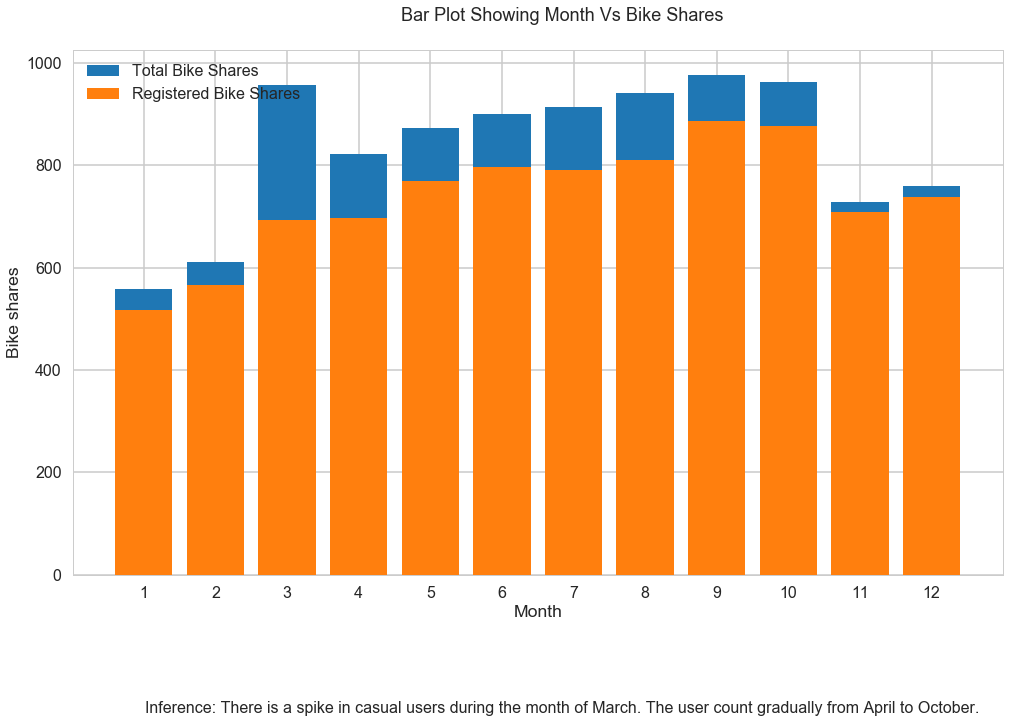

In [269]:
fig = plt.gcf()
fig.suptitle('Bar Plot Showing Month Vs Bike Shares', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(16, 10)

plt.bar(df['mnth'], df['cnt'])
plt.bar(df['mnth'], df['registered'])
plt.xlabel('Month')
plt.xticks(range(1,13,1),range(1,13,1))
plt.ylabel('Bike shares')
plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
plt.legend(['Total Bike Shares', 'Registered Bike Shares'])
fig.text(0.5,0, 'Inference: There is a spike in casual users during the month of March. The user count gradually from April to October.',horizontalalignment='center',
     verticalalignment='baseline',
     size=16)
plt.show()

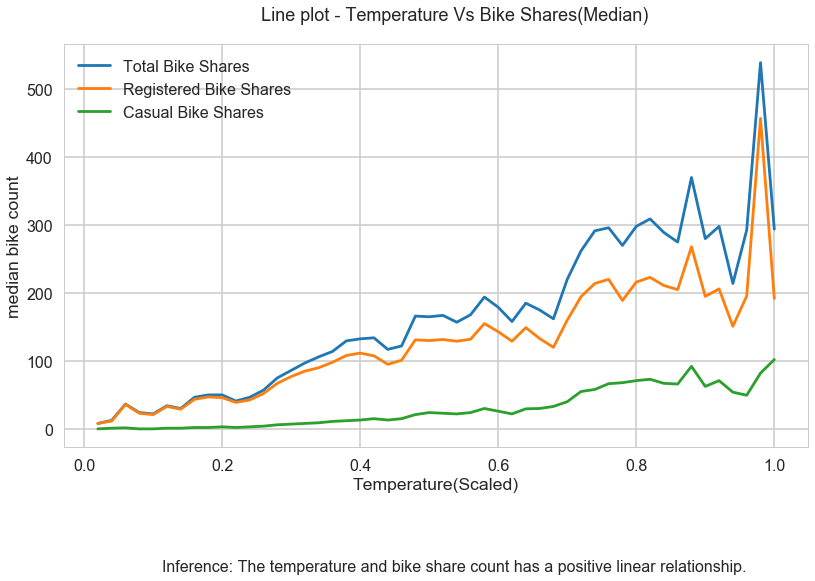

In [253]:
gby = df.groupby('temp')
df1 = pd.DataFrame({'cnt': gby.cnt.median(), 'registered': gby.registered.median(), 'casual': gby.casual.median()})

fig = plt.gcf()
fig.suptitle('Line plot - Temperature Vs Bike Shares(Median)', 
             fontsize=18, horizontalalignment = 'center')
plt.plot(df1.index, df1['cnt'])
plt.plot(df1.index, df1['registered'])
plt.plot(df1.index, df1['casual'])

plt.xlabel('Temperature(Scaled)')
plt.ylabel('median bike count')
plt.legend(['Total Bike Shares', 'Registered Bike Shares', 'Casual Bike Shares'])
plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
fig.text(0.5,0, 'Inference: The temperature and bike share count has a positive linear relationship.',horizontalalignment='center',
     verticalalignment='baseline',
     size=16)

plt.show()

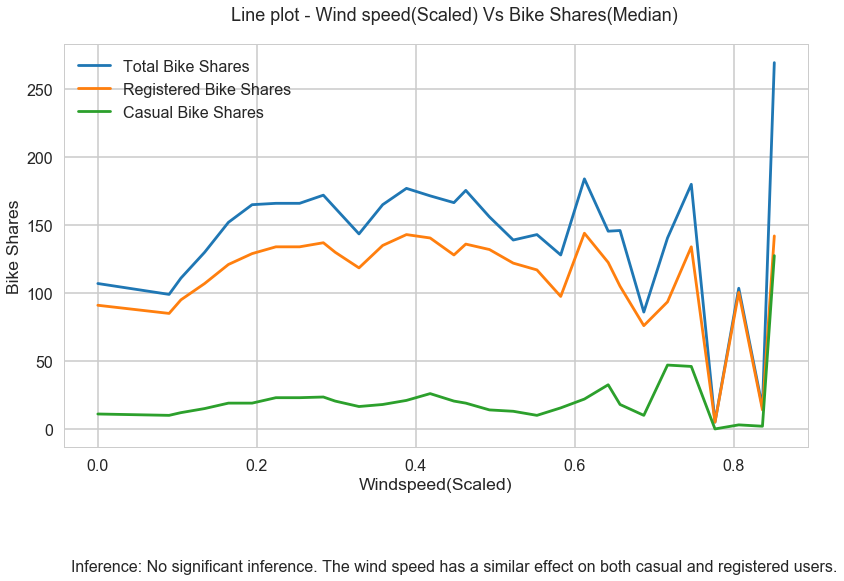

In [254]:
gby = df.groupby('windspeed')

df1 = pd.DataFrame({'cnt': gby.cnt.median(), 'registered': gby.registered.median(), 'casual': gby.casual.median()})

fig = plt.gcf()
fig.suptitle('Line plot - Wind speed(Scaled) Vs Bike Shares(Median)', 
             fontsize=18, horizontalalignment = 'center')
plt.plot(df1.index, df1['cnt'])
plt.plot(df1.index, df1['registered'])
plt.plot(df1.index, df1['casual'])

plt.xlabel('Windspeed(Scaled)')
plt.ylabel('Bike Shares')
plt.legend(['Total Bike Shares', 'Registered Bike Shares', 'Casual Bike Shares'])
plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
fig.text(0.5,0, 'Inference: No significant inference. The wind speed has a similar effect on both casual and registered users.',horizontalalignment='center',
     verticalalignment='baseline',
     size=16)

plt.show()

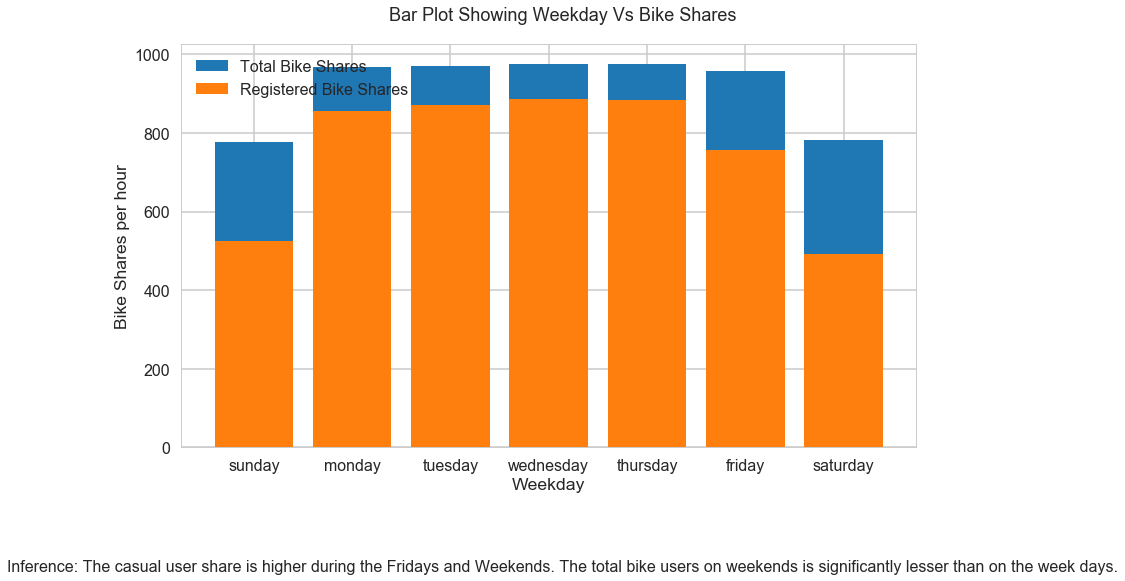

In [255]:
day_labels = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']

fig = plt.gcf()
fig.suptitle('Bar Plot Showing Weekday Vs Bike Shares', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(9, 6, forward=True)
plt.bar(df['weekday'], df['cnt'])
plt.bar(df['weekday'], df['registered'])
plt.xticks(range(7), day_labels)
plt.xlabel('Weekday')
plt.ylabel('Bike Shares per hour')
plt.legend(['Total Bike Shares', 'Registered Bike Shares'])
plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
fig.text(0.5,0, 'Inference: The casual user share is higher during the Fridays and Weekends. The total bike users on weekends is significantly lesser than on the week days.',horizontalalignment='center',
     verticalalignment='baseline',
     size=16)

plt.show()

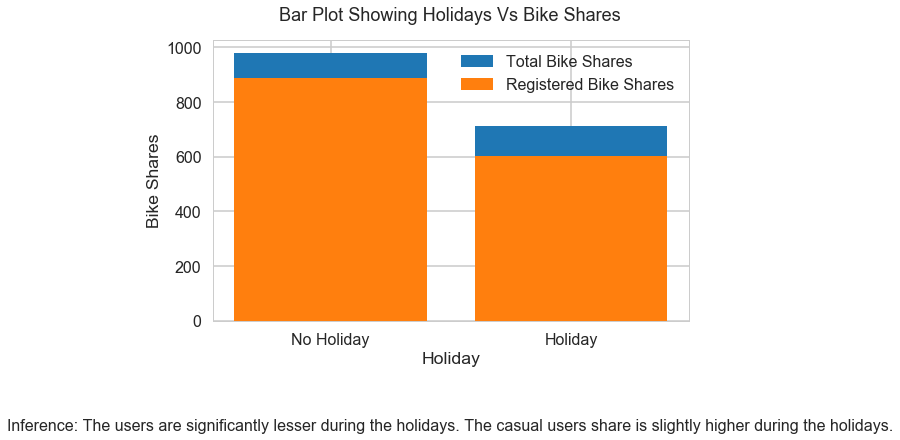

In [257]:
fig = plt.gcf()
fig.suptitle('Bar Plot Showing Holidays Vs Bike Shares', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(9, 6, forward=True)

plt.bar(df['holiday'], df['cnt'])
plt.bar(df['holiday'], df['registered'])

plt.xlabel('Holiday')
plt.ylabel('Bike Shares')
plt.legend(['Total Bike Shares', 'Registered Bike Shares'])
plt.xticks([0,1], ['No Holiday', 'Holiday'])
plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
fig.text(0.5,0, 'Inference: The users are significantly lesser during the holidays. The casual users share is slightly higher during the holidays.',horizontalalignment='center',
     verticalalignment='baseline',
     size=16)

plt.show()

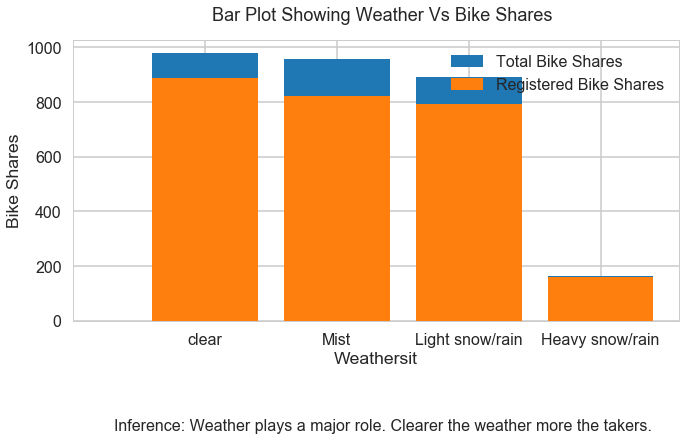

In [259]:
fig = plt.gcf()
fig.suptitle('Bar Plot Showing Weather Vs Bike Shares', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(11, 6, forward=True)

plt.bar(df['weathersit'], df['cnt'])
plt.bar(df['weathersit'], df['registered'])

plt.xlabel('Weathersit')
plt.ylabel('Bike Shares')
plt.legend(['Total Bike Shares', 'Registered Bike Shares'])
plt.xticks([0,1,2,3,4], ['','clear', 'Mist', 'Light snow/rain', 'Heavy snow/rain'])
plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
fig.text(0.5,0, 'Inference: Weather plays a major role. Clearer the weather more the takers.',horizontalalignment='center',
     verticalalignment='baseline',
     size=16)

plt.show()

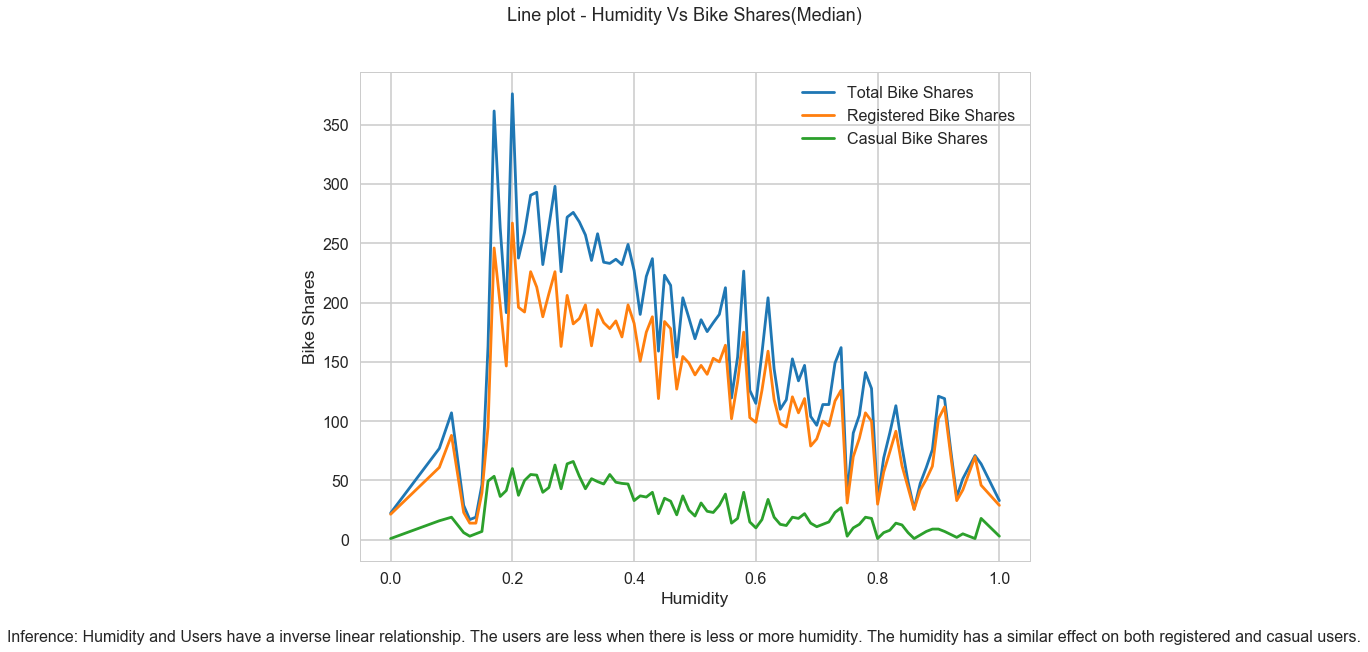

In [263]:
gby = df.groupby('hum')

df1 = pd.DataFrame({'cnt': gby.cnt.median(), 'registered': gby.registered.median(), 'casual': gby.casual.median()})

fig = plt.gcf()
fig.suptitle('Line plot - Humidity Vs Bike Shares(Median)', 
             fontsize=18, horizontalalignment = 'center')
fig.set_size_inches(12, 9, forward=True)

plt.plot(df1.index, df1['cnt'])
plt.plot(df1.index, df1['registered'])
plt.plot(df1.index, df1['casual'])

plt.xlabel('Humidity')
plt.ylabel('Bike Shares')
plt.legend(['Total Bike Shares', 'Registered Bike Shares', 'Casual Bike Shares'])
fig.text(0.5,0, 'Inference: Humidity and Users have a inverse linear relationship. The users are less when there is less or more humidity. The humidity has a similar effect on both registered and casual users.',horizontalalignment='center',
     verticalalignment='baseline',
     size=16)

plt.show()

<H2>Findings</H2>

<ol>
<li> Most of the users are registered regular users.</li>
<li> There is a significant increase in users in 2012. This may be due to a good marketing strategy.</li>
<li> There is less usage during weekends.</li>
<li> There is less usage during the holidays.</li>
<li> The company has failed to attract casual users and tourists. The marketing strategy should also focus on this group which can boost the business in the coming years.</li>
<li> The summer and fall has higher usage than winter and spring.</li>
<li> The march month has the highest share of casual users. This is probably because of tourists or political gatherings.</li>
<li> The temperature has a linear relationship with the number of users.</li>
<li> There are almost no users during harsh weathers which is expected.</li>
<li> The humidity has a inverse relationship with the number of users.</li>
<li> The company can provide better support or equipments during the colder days to increase the number of users.</li>
<li> As few predictor variables have positive and negative relationships with the dependant variable, linear machine learning models can be used to solve the problem.
</ol>
